In [1]:
import graspy
import numpy as np
from graspy.simulations import rdpg

In [27]:
n = 100
X1 = np.zeros([n, 1])
deltan = 20
deltax = .1
t = 12

for i in range(n):
    X1[i] = np.random.uniform(0.2, 0.8)

At = np.zeros([t, n, n])
Xt = np.zeros([t, n])
Z = np.r_[deltax*np.ones([deltan//2, 1]), -deltax*np.ones([deltan//2, 1]), np.zeros([n-deltan, 1])]

for i in range(12):
    Xt[i] = np.squeeze(X1)
    if i == 5:
        Xt[i] = np.squeeze(X1+Z)
    elif i == 6: 
        Xt[i] = np.squeeze(X1-Z)
    
    At[i] = rdpg(np.c_[Xt[i], Xt[i]])
    
print(At.shape)

(12, 100, 100)


<Figure size 360x360 with 0 Axes>

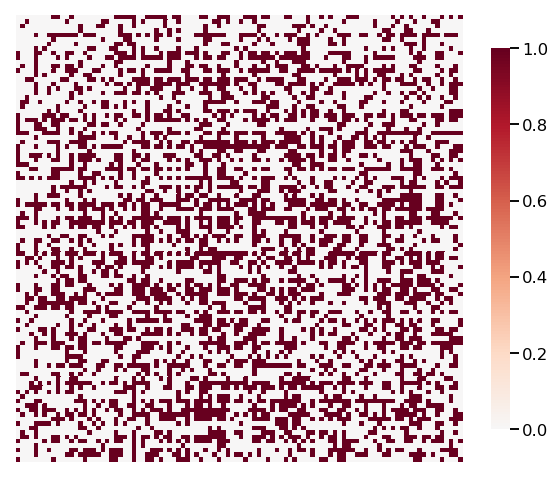

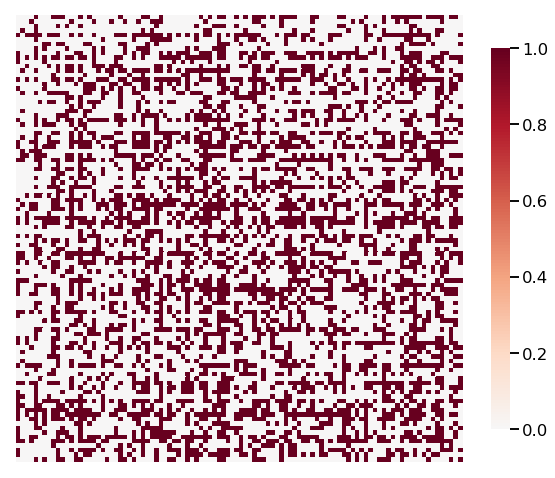

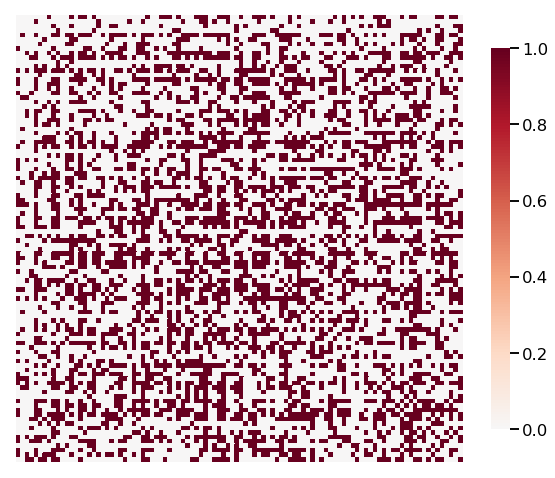

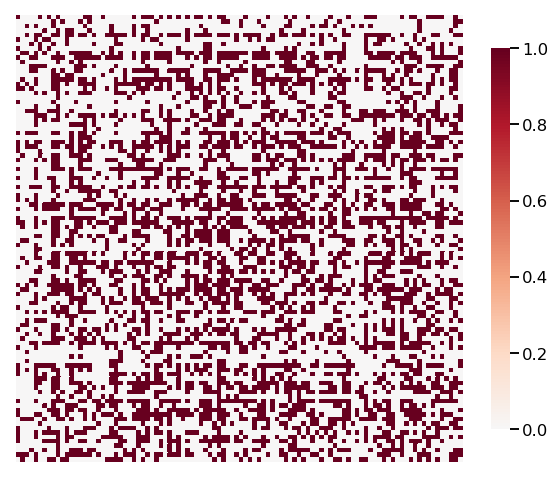

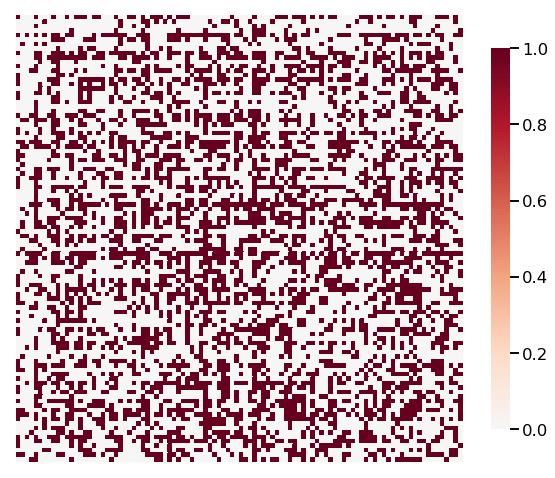

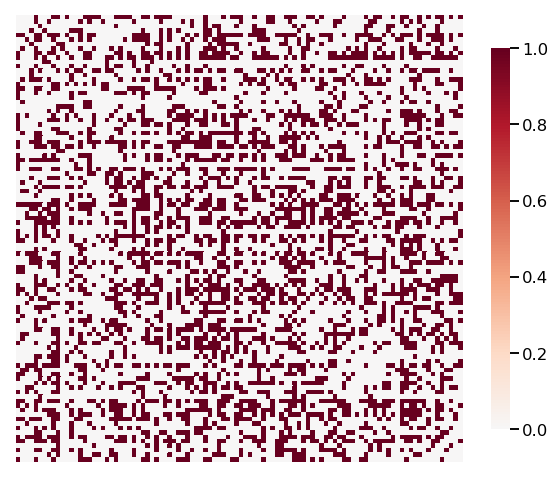

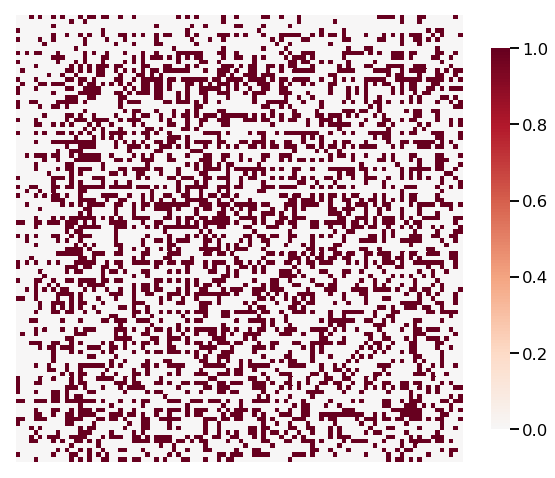

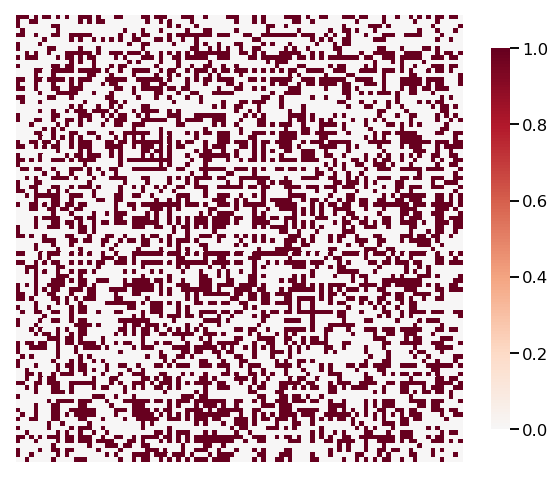

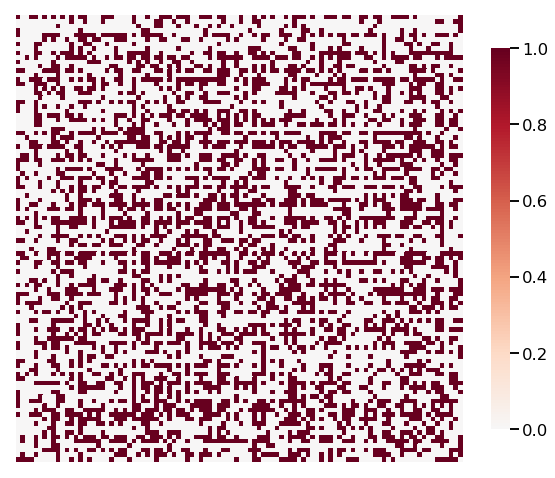

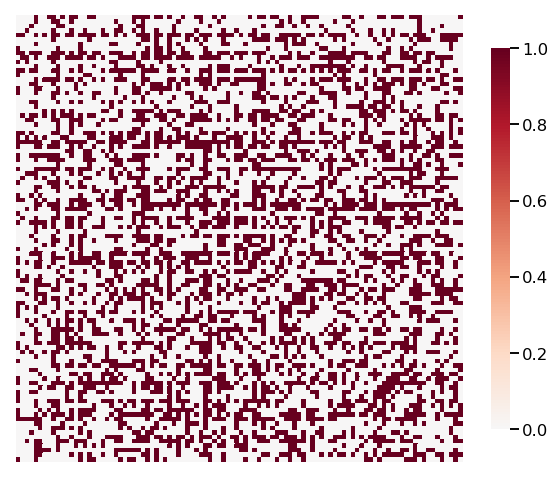

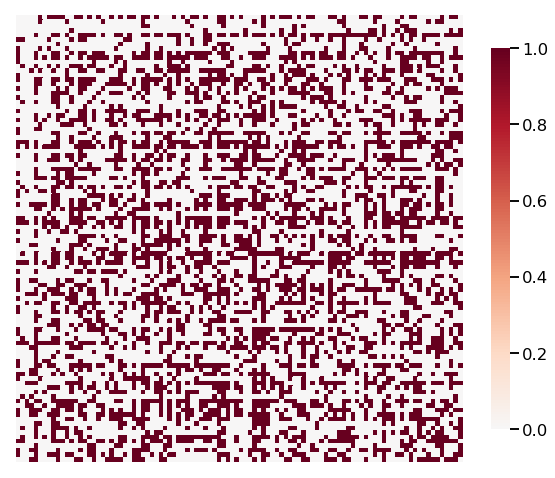

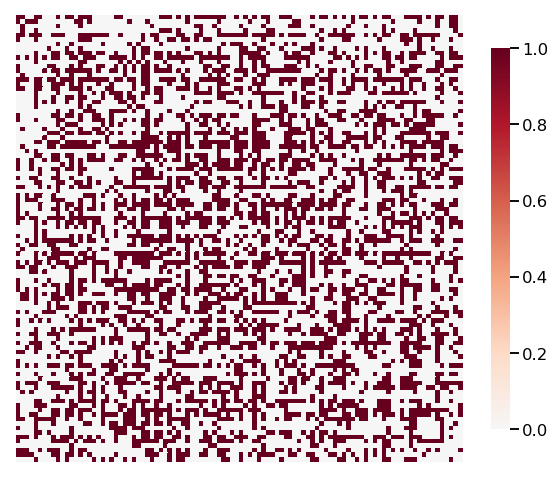

In [36]:
from graspy.plot import heatmap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))

for i in range(t):
    ax = fig.add_subplot()
    A = At[i]
    ax = heatmap(A)